# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [57]:
import numpy as np              # maths
import pandas as pd             # data processing
import matplotlib.pyplot as plt # plotting
from sklearn.preprocessing import LabelEncoder # 

# First we must import the data
df = pd.read_csv('./agaricus-lepiota.data')
df.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [58]:
# Preprocessing

# Veil-type has only one possible value, and has no use
if 'veil-type' in df: 
    df = df.drop(['veil-type'], axis=1)

# Since we are doing unsupervised learning, we don't actually have a target class, meaning we
# can remove this datasets actual target class, edibility
if 'edibility' in df: 
    df = df.drop(['edibility'], axis=1)

# Create dummy variables 
df = pd.get_dummies(df)
dummies = pd.get_dummies(df).rename(columns=lambda x: 'Category_' + str(x))
df = pd.concat([df, dummies], axis=1)

df.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,Category_population_s,Category_population_v,Category_population_y,Category_habitat_d,Category_habitat_g,Category_habitat_l,Category_habitat_m,Category_habitat_p,Category_habitat_u,Category_habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,0.314623,0.399311,...,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,0.464394,0.489787,...,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


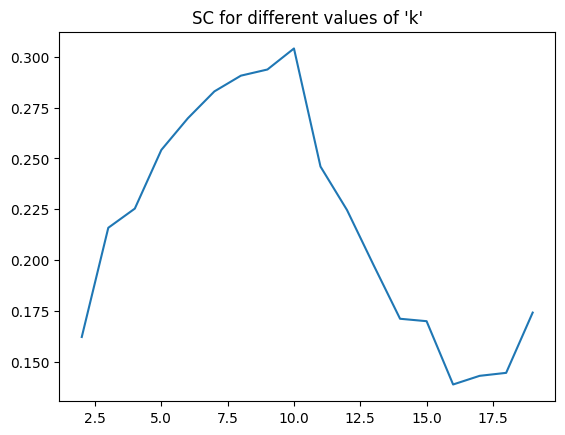

In [62]:
# Clustering with KMEANS
from sklearn import metrics
from sklearn.cluster import KMeans

# Calculate silhoutte scores for different values of k
max_k = 20
scores = {}
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sc = metrics.silhouette_score(df, kmeans.labels_, metric='euclidean')
    scores[k] = sc

# Plot results in line chart
plt.title("SC for different values of 'k'")
plt.plot(scores.keys(), scores.values())
plt.show()

In [60]:
# Get best k 
k_best = 2
for k in scores:
    if scores[k] > scores[k_best]:
        k_best = k

# Use best k to create model
kmeans = KMeans(n_clusters=k_best)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

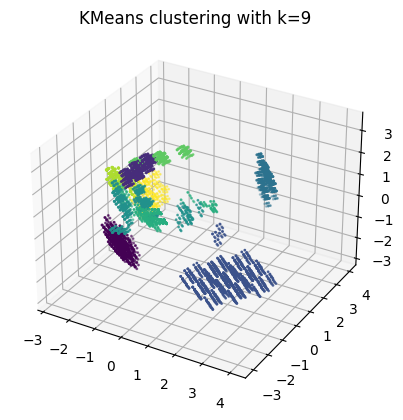

In [63]:
# Dimension reduction
from sklearn.decomposition import PCA
from sklearn import preprocessing

# normalize data
data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 

# reduce dimension with principal component analysis (PCA)
pca = PCA(n_components=3)
x = pca.fit_transform(df)

# Plot result. Each cluster is color-coded
ax = plt.figure().add_subplot(projection='3d')
ax.set_title((f"KMeans clustering with k={k_best}"))
ax.scatter(x[:, 0], x[:, 1], x[:, 2], s=1, c=y_kmeans)

plt.show()